<a href="https://colab.research.google.com/github/tualim/CT526-programing-algorithm/blob/main/Python_2_65130495.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Libraries for Data Science in Python
We will discuss NumPy, Pandas, Matplotlib, Seaborn.

Notebook written by Papoj Thamjaroenporn, 2022.

## Google Colab / Jupyter Notebook Tips
- `Esc` to "exit" the current cell
- Then `A` to add new cell above, `B` to add new cell below, or arrow keys to navigate between cells.

## NumPy

NumPy is a popular library for storing arrays of numbers and performing computations on them. Not only this enables to write often more succinct code, this also makes the code faster, since most NumPy routines are implemented in C for speed.

To use NumPy in your program, you need to import it as follows

In [ ]:
import numpy as np

### Array creation



NumPy arrays can be created from Python lists

In [ ]:
my_array = np.array([1, 2, 3])
my_array

array([1, 2, 3])

NumPy supports array of arbitrary dimension. For example, we can create two-dimensional arrays (e.g. to store a matrix) as follows

In [ ]:
my_2d_array = np.array([[1, 2, 3], [4, 5, 6]])
my_2d_array

array([[1, 2, 3],
       [4, 5, 6]])

We can access individual elements of a 2d-array using two indices

In [ ]:
my_2d_array[1, 2]

6

We can also access rows

In [ ]:
my_2d_array[1]

array([4, 5, 6])

and columns

In [ ]:
my_2d_array[:, 2]

array([3, 6])

You can also access a _part_ of the matrix:

In [ ]:
# Take all rows, but only 1st and 2nd column
# Recall the Python convention that start:stop will take from start up to stop - 1
my_2d_array[:, 1:3]

array([[2, 3],
       [5, 6]])

Arrays have a `shape` attribute

In [ ]:
print(my_array.shape)
print(my_2d_array.shape)

(3,)
(2, 3)


Contrary to Python lists, NumPy arrays must have a type and all elements of the array must have the same type.

In [ ]:
my_array.dtype

dtype('int64')

The main types are `int32` (32-bit integers), `int64` (64-bit integers), `float32` (32-bit real values) and `float64` (64-bit real values).

The `dtype` can be specified when creating the array

In [ ]:
my_array = np.array([1, 2, 3], dtype=np.float64)
my_array.dtype

dtype('float64')

We can create arrays of all zeros using

In [ ]:
zero_array = np.zeros((2, 3))
zero_array

array([[0., 0., 0.],
       [0., 0., 0.]])

and similarly for all ones using `ones` instead of `zeros`.

We can create a range of values using

In [ ]:
np.arange(5)

array([0, 1, 2, 3, 4])

or specifying the starting point

In [ ]:
np.arange(3, 5)

array([3, 4])

Another useful routine is `linspace` for creating linearly spaced values in an interval. For instance, to create 10 values in `[0, 1]`, we can use

In [ ]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [ ]:
np.linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Another important operation is `reshape`, for changing the shape of an array

In [ ]:
my_array = np.array([1, 2, 3, 4, 5, 6])
my_array.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

Play with these operations and make sure you understand them well.

#### Exercises: NumPy Array Creation
**Exercise NAC.1** Create a 2D array `x` of shape (2, 4), containing 8 following values:

\begin{bmatrix}
10 & 20 & 15 & 5\\
20 & 10 & 25 & 40
\end{bmatrix}	

**Exercise NAC.2** Access and display the element `40` in `x`.

**Exercise NAC.3** Access and display the entire second row in `x`.

**Exercise NAC.4** Access and display the entire third column in `x`.

**Exercise NAC.5** Access and display the following sub-2D array from `x` using slicing:
\begin{bmatrix}
20 & 15 & 5\\
10 & 25 & 40
\end{bmatrix}	

**Exercise NAC.6** Create a 1D array `y` with the following elements:
\begin{bmatrix}
0 & 0.5 & 1.0 & 1.5 & ... & 22
\end{bmatrix}	

**Exercise NAC.7** Reshape `y` into a 2D array with three rows.

In [ ]:
# Your code here (feel free to add multiple cells)


### Basic operations

In NumPy, we express computations directly over arrays. This makes the code much more succint.

Arithmetic operations can be performed directly over arrays. For instance, assuming two arrays have a compatible shape, we can add them as follows

In [ ]:
array_a = np.array([1, -2, 3])
array_b = np.array([4, 7, 10])
array_a + array_b

array([ 5,  5, 13])

Element-wise multiplication:

In [ ]:
array_a * array_b

array([  4, -14,  30])

Compare this with the equivalent computation using a for loop

In [ ]:
array_out = np.zeros_like(array_a)
for i in range(len(array_a)):
  array_out[i] = array_a[i] + array_b[i]
array_out

array([ 5,  5, 13])

Not only this code is more verbose, it will also run much more slowly.

In NumPy, functions that operates on arrays in an element-wise fashion are called [universal functions](https://numpy.org/doc/stable/reference/ufuncs.html). For instance, this is the case of `np.sin`

In [ ]:
np.sin(array_a)

array([ 0.84147098, -0.90929743,  0.14112001])

Vector inner product can be performed using `np.dot`

In [ ]:
np.dot(array_a, array_b)

20

The `@` operation also works with matrix-vector or vector-vector (dot product) multiplication.

In [ ]:
array_a @ array_b

20

When the two arguments to `np.dot` are both 2d arrays, `np.dot` becomes matrix multiplication

In [ ]:
array_A = np.random.rand(5, 3)
array_B = np.random.randn(3, 4)
np.dot(array_A, array_B)

array([[-1.67111334, -3.15234989,  0.79972524, -0.49205688],
       [-0.83895642, -3.25113377,  0.63599559,  0.3167454 ],
       [-0.17861042, -1.32112203,  0.227083  ,  0.18854547],
       [-1.38792133, -3.93718107,  0.83708086,  0.3851134 ],
       [-1.47889663, -2.73010125,  0.69791034, -0.41542669]])

In [ ]:
array_A @ array_B

array([[-1.67111334, -3.15234989,  0.79972524, -0.49205688],
       [-0.83895642, -3.25113377,  0.63599559,  0.3167454 ],
       [-0.17861042, -1.32112203,  0.227083  ,  0.18854547],
       [-1.38792133, -3.93718107,  0.83708086,  0.3851134 ],
       [-1.47889663, -2.73010125,  0.69791034, -0.41542669]])

Matrix transpose can be done using `.transpose()` or `.T` for short

In [ ]:
array_A.T

array([[0.41534   , 0.76266029, 0.31643506, 0.99179756, 0.37185704],
       [0.07302659, 0.93043002, 0.52815251, 0.79326653, 0.03568102],
       [0.95407128, 0.27831956, 0.0415397 , 0.41316895, 0.82603694]])

Create an array with all ones.

In [ ]:
array_ones = np.ones(3)
array_ones

array([1., 1., 1.])

Stacking two 1D arrays on top of each other:

In [ ]:
matrix_stacked = np.vstack((array_a, array_b, array_ones))
print(matrix_stacked)

[[ 1. -2.  3.]
 [ 4.  7. 10.]
 [ 1.  1.  1.]]


You can calculate the inverse of a square matrix using `inv` (assuming the matrix is not [singular](https://mathworld.wolfram.com/SingularMatrix.html)):

In [ ]:
from numpy.linalg import inv

matrix_stacked_inv = inv(matrix_stacked)
print(matrix_stacked_inv)

[[ 0.125      -0.20833333  1.70833333]
 [-0.25        0.08333333 -0.08333333]
 [ 0.125       0.125      -0.625     ]]


You get the identity matrix when multiplying a square matrix with its inverse:

In [ ]:
print(matrix_stacked_inv @ matrix_stacked)

[[ 1.00000000e+00  0.00000000e+00  2.22044605e-16]
 [-1.38777878e-17  1.00000000e+00 -4.16333634e-17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


#### Exercise: NumPy Basic Operations
**Exercise NBO.1** Create and display a 1D vector `v` with values `[4, -6]`

**Exercise NBO.2** Create and display a 1D vector `w` with values `[2, -10]`

**Exercise NBO.3** Display the result of `v` subtracted by `w`

**Exercise NBO.4** Display the result of the dot product between `v` and `w`

**Exercise NBO.5** Display the result of element-wise multiplication between `v` and `w`

**Exercise NBO.6** Display the result of matrix-vector multiplication between the transpose of `x` (from previous exercise) and `v`

In [ ]:
# Your code here (feel free to add multiple cells)

#### Exercise: Simple Linear Regression
We now know enough operations to perform simple linear regression. Here, we will use a closed-form formula for the linear regression.

Let $\mathbb{X}$ be a matrix of size `n` by `p` where `n` is the number of observations and `p` is the number of features. Here, $\mathbb{X}$ is the "input data" you'd like to use to make some predictions.

Let $y$ be a vector of size `n` designated as the "target" you would like to make predictions.

We impose the model $y = \mathbb{X} \beta + \epsilon$ on our data, where $\beta$ is a vector of size `p` designated as the linear model's coefficients. We would like to "learn" these coefficients from our data, and $\epsilon$ is the "residual" vector whose elements are assumed to have an independent and identically distributed (i.i.d.) Gaussian distribution.

Assuming that $\mathbb{X}$ is a matrix with full column [rank](https://en.wikipedia.org/wiki/Rank_(linear_algebra)), then, the $\beta$ coefficient vector has a closed form given by:

$$\beta = (\mathbb{X}^T \mathbb{X})^{-1} \mathbb{X}^T y$$

and our vector of predicted values $\hat{y}$ is given by:

$$\hat{y} = \mathbb{X} \beta$$

**Exercise SLR.1** We have observed the following data points: `[17,  7, 18,  3, 10, 15,  3,  5, 15, 12]`. First, create and display the a matrix (capital letter) `X` where the first column contains all ones. Your matrix `X` should look like this:

\begin{bmatrix}
1 & 17\\
1 & 7\\
1 & 18\\
... & ...\\
1 & 12
\end{bmatrix}	

Hint: you can create its transpose first using `vstack`, and use transpose `T`. 



In [ ]:
# Your code here

[[ 1. 17.]
 [ 1.  7.]
 [ 1. 18.]
 [ 1.  3.]
 [ 1. 10.]
 [ 1. 15.]
 [ 1.  3.]
 [ 1.  5.]
 [ 1. 15.]
 [ 1. 12.]]


**Exercise SLR.2** We have observed the following target data points: `[76.63817453, 32.21934158, 81.62485378, 14.49332001, 45.02840253, 67.57658105, 13.5483866 , 22.9610779 , 67.66410092, 54.838518  ]`
       
Create and display the vector `y` with these observed target values.


In [ ]:
# Your code here

**Exercise SLR.3** Calculate and display $\beta$ using the formula given above. Name your variable `beta`.

In [ ]:
# Your code here

**Exercise SLR.4** Write down the equation that predicts the value of $\hat{y}$ given the value of $x$:

Write your answer here (double-click this cell)

**Exercise SLR.5** You observe a new data point $x = 11.5$. Predict the value of $y$ using your regression model.

1. Create a new vector `x0` as `[1, 11.5]`.
2. Take advantage of the model equation $\hat{y} = \mathbb{X} \beta$ but here $\mathbb{X}$ is a 1-by-2 matrix.
3. Display your prediction showing the value of `x0` and predicted value `predicted_y`.

What is your predicted value?

In [ ]:
# Your code here

Visualizing linear regression results

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.plot(X[:,1], y, 'o')

In [ ]:
plt.plot(X[:,1], y, 'o')
plt.plot(X[:,1], X @ beta)

### Slicing and masking (logical indexing)

Like Python lists, NumPy arrays support slicing

In [ ]:
np.arange(10)[5:]

array([5, 6, 7, 8, 9])

We can also select only certain elements from the array

In [ ]:
x = np.arange(10)
mask = x >= 5
x[mask]

array([5, 6, 7, 8, 9])

### Additional NumPy Exercises

#### Exercise ANE.1
In Python Redux module, we have previously written [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) function defined as follows:

$\text{relu}(x) = \left\{
   \begin{array}{rl}
     x, & \text{if }  x \ge 0 \\
     0, & \text{otherwise }.
   \end{array}\right.$

Now, rewrite the ReLU function using [np.maximum](https://numpy.org/doc/stable/reference/generated/numpy.maximum.html). You may browse the documentation online for how `np.maximum` works. Check that it works on both a single value and on an array of values.

In [ ]:
def relu_numpy(x):
  # Your code here


In [ ]:
relu_numpy(np.array([1, -3, 2.5]))

array([1. , 0. , 2.5])

In [ ]:
relu_numpy(-10)

0

#### Exercise ANE.2
In Python Redux module, we have previously seen the implementation of the Euclidean norm for a list input. Now, rewrite the Euclidean norm of a vector (1D array) using NumPy (without for loop).

Hint: a brief online search may reveal a simple function you can use.

In [ ]:
# Your code here
from numpy.linalg import norm

def euclidean_norm_numpy(x):
  # Your code here
  

In [ ]:
my_vector = np.array([0.5, -1.2, 3.3, 4.5])
euclidean_norm_numpy(my_vector)

5.729746940310715

#### Exercise ANE.3
Write a function that computes the Euclidean norms of a matrix (2D array) in a row-wise fashion. 

Hint: use the `axis` argument of [np.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html).

In [ ]:
def euclidean_norm_2d(X):
  # Your code here


In [ ]:
my_matrix = np.array([[0.5, -1.2, 3.3, 4.5],
                      [-3.2, 1.9, 2.7, 7.1]])
# Should return an array of size 2.
euclidean_norm_2d(my_matrix)

array([5.72974694, 8.45872331])

#### Exercise ANE.4
Compute the mean value of the features in the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). 

Hint: use the `axis` argument on [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html).

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Your code here
# Result should be an array of size 4.

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

## Pandas

[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

### Series

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.Series(np.arange(4))

0    0
1    1
2    2
3    3
dtype: int64

In [ ]:
pd.Series([0, 1, 2, 3])

0    0
1    1
2    2
3    3
dtype: int64

In [ ]:
pd.Series(np.arange(4),index=['A','B','C','D'])

A    0
B    1
C    2
D    3
dtype: int64

In [ ]:
pd.Series({'A':2000,'B':2002,'C':2002,'D':2014})

A    2000
B    2002
C    2002
D    2014
dtype: int64

In [ ]:
x = pd.Series({'A':2000,'B':2002,'C':2002,'D':2014})
print(x.loc['A'])
print(x.loc['D'])

2000
2014


In [ ]:
print(x.loc[['A', 'D']])

A    2000
D    2014
dtype: int64


In [ ]:
x.unique()

array([2000, 2002, 2014])

In [ ]:
x.describe()

count       4.000000
mean     2004.500000
std         6.403124
min      2000.000000
25%      2001.500000
50%      2002.000000
75%      2005.000000
max      2014.000000
dtype: float64

In [ ]:
x.value_counts()

2002    2
2000    1
2014    1
dtype: int64

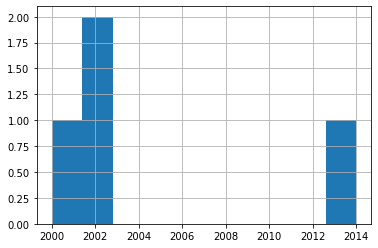

In [ ]:
x.hist()

In [ ]:
# Apply: Approach 1
x.apply(lambda number: number+543)

A    2543
B    2545
C    2545
D    2557
dtype: int64

In [ ]:
# Apply: Approach 2
def mapADtoBE(ad_year):
  """Map ค.ศ. to พ.ศ."""
  be_year = ad_year + 543
  return be_year

x.apply(mapADtoBE)

A    2543
B    2545
C    2545
D    2557
dtype: int64

#### Exercise: Pandas Series

**Exercise PS.1** Build a pandas Series `x` with data `0, 1, 2, 2, 1, 2, 4`.

**Exercise PS.2** Describe basic statistics of `x`. What is its median?

**Exercise PS.3** Plot a simple histogram of values in `x`.

**Exercise PS.4** Transform all numbers within `x` to be the cube (take to power of 3) of the original numbers.

In [ ]:
# Your code here

In [ ]:
# Your code here

In [ ]:
# Your code here


In [ ]:
# Your code here


### DataFrame

#### Overview

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
populations = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': populations })

City name  Population
0  San Francisco      852469
1       San Jose     1015785
2     Sacramento      485199

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [ ]:
df = pd.read_csv("california_housing_train.csv", sep=",")

In [ ]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [ ]:
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0

In [ ]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27e2e25df0>]],
      dtype=object)

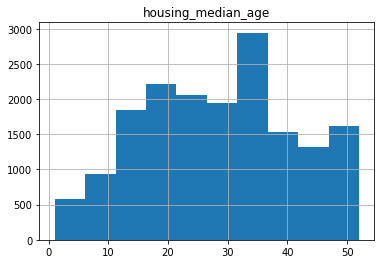

In [ ]:
df.hist('housing_median_age')

#### Accessing Data & Creating Columns
You can access `DataFrame` data using familiar Python dict/list operations:

In [ ]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': populations })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [ ]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [ ]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


City name  Population
0  San Francisco      852469
1       San Jose     1015785

You can add a new column into an existing DataFrame:

In [ ]:
# area in km^2
cities["Area"] = [121.4, 469.7, 258.4]
cities

City name  Population   Area
0  San Francisco      852469  121.4
1       San Jose     1015785  469.7
2     Sacramento      485199  258.4

You can also create a new column from calculation on existing columns:

In [ ]:
cities["Density"] = cities["Population"] / cities["Area"] 
cities

City name  Population   Area      Density
0  San Francisco      852469  121.4  7021.985173
1       San Jose     1015785  469.7  2162.625080
2     Sacramento      485199  258.4  1877.705108

Remark: San Francisco is the most densely populated city, despite its smallest area among the three cities.

#### Slicing and Indexing

In [ ]:
cities.loc[0]

City name     San Francisco
Population           852469
Area                  121.4
Density         7021.985173
Name: 0, dtype: object

In [ ]:
cities.loc[[0, 2]]

City name  Population   Area      Density
0  San Francisco      852469  121.4  7021.985173
2     Sacramento      485199  258.4  1877.705108

In [ ]:
cities.loc[[0,2], "Population"]

0    852469
2    485199
Name: Population, dtype: int64

In [ ]:
cities["Population"]

0     852469
1    1015785
2     485199
Name: Population, dtype: int64

In [ ]:
cities["Area"] > 150

0    False
1     True
2     True
Name: Area, dtype: bool

In [ ]:
# Logical indexing
cities[cities["Area"] > 150]

City name  Population   Area      Density
1    San Jose     1015785  469.7  2162.625080
2  Sacramento      485199  258.4  1877.705108

In [ ]:
# How many ciities have area greater than 150 square meters?
(cities["Area"] > 150).sum()

2

#### Exercise: Pandas Data Access

**Exercise PDA.1** Create a new column `population_per_household` that calculates the population per household in the California housing data.

**Exercise PDA.2** Describe summarizing statistics about `population_per_household`. What is its min, max, and mean, median?

**Exercise PDA.3** Select and display only rows with indices 10 - 20, and column `population` only.

**Exercise PDA.4** Select and display only rows whose population per household exceeds 3.

**Exercise PDA.5** Among the observations with population per household exceeding 3, what is the median total rooms?

In [ ]:
# Your code here

In [ ]:
# Your code here


In [ ]:
# Your code here


In [ ]:
# Your code here


In [ ]:
# Your code here


#### Group By, Data Aggregation, Data Filtration by Group

By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria.
- Applying a function to each group independently.
- Combining the results into a data structure.

Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. In the apply step, we might wish to do one of the following:

- Aggregation: compute a summary statistic (or statistics) for each group. Some examples:
  - Compute group sums or means.
  - Compute group sizes / counts.
- Transformation (not covered here): perform some group-specific computations and return a like-indexed object. Some examples:
  - Standardize data (zscore) within a group.
  - Filling NAs within groups with a value derived from each group.
- Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:
  - Discard data that belongs to groups with only a few members.
  - Filter out data based on the group sum or mean.
- Some combination of the above

In [ ]:
# We will modify the cities dataset a little bit
states = pd.Series(['California', 'California', 'California', 'New York', 'New York'])
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento', 'New York City', 'Buffalo'])
populations = pd.Series([852469, 1015785, 485199, 8804190, 276807])
areas = pd.Series([121.4, 469.7, 258.4, 778.2, 136])

# Your code here
cities = pd.DataFrame({'State': states, 
                       'City name': city_names, 
                       'Population': populations, 
                       'Area': areas})
cities['Density'] = cities['Population'] / cities['Area']

In [ ]:
cities

State      City name  Population   Area       Density
0  California  San Francisco      852469  121.4   7021.985173
1  California       San Jose     1015785  469.7   2162.625080
2  California     Sacramento      485199  258.4   1877.705108
3    New York  New York City     8804190  778.2  11313.531226
4    New York        Buffalo      276807  136.0   2035.345588

Given the `cities` dataset above, one could ask the questions that require some sort of "grouping" of data records by state. Examples:
- What is the sum of population by state?
- Filter out cities whose state's total population does not exceed 8 million.

The answer is `groupby` followed by the operations or calculations you want to perform.

In [ ]:
city_groups = cities.groupby("State")
city_groups

The `groups` property can list out row indices that belong to each group.

In [ ]:
city_groups.groups

{'California': [0, 1, 2], 'New York': [3, 4]}

The function `get_group` lets you retrieve the subset of your data based on the value in your groupby column.

In [ ]:
city_groups.get_group("New York")

State      City name  Population   Area       Density
3  New York  New York City     8804190  778.2  11313.531226
4  New York        Buffalo      276807  136.0   2035.345588

**Mini challenge**: can you come up with another expression that yields the same result as `get_group()` above, but without using `get_group()` or `groupby`?

In [ ]:
# Your code here


State      City name  Population   Area       Density
3  New York  New York City     8804190  778.2  11313.531226
4  New York        Buffalo      276807  136.0   2035.345588

What is the sum of population by state?

In [ ]:
cities

State      City name  Population   Area       Density
0  California  San Francisco      852469  121.4   7021.985173
1  California       San Jose     1015785  469.7   2162.625080
2  California     Sacramento      485199  258.4   1877.705108
3    New York  New York City     8804190  778.2  11313.531226
4    New York        Buffalo      276807  136.0   2035.345588

In [ ]:
# cities.groupby("State").sum()
city_groups.sum()

Population   Area       Density
State                                      
California     2353453  849.5  11062.315361
New York       9080997  914.2  13348.876814

**Question**: does it make sense to simply sum the `Density`?

In [ ]:
# Just the sum of population
city_groups[["Population"]].sum()

Population
State                 
California     2353453
New York       9080997

In [ ]:
# Just the average of population
city_groups[["Population"]].mean()

Population
State                   
California  7.844843e+05
New York    4.540498e+06

In [ ]:
# You can perform multiple aggregations with `agg` function. With this function, you can also rename output columns.
city_groups_agg = city_groups.agg(Avg_Population=("Population", "mean"), Total_Population=("Population", "sum"))
city_groups_agg

Avg_Population  Total_Population
State                                       
California    7.844843e+05           2353453
New York      4.540498e+06           9080997

The "State" is currently not part of the actualy data -- it's become the row index.

In [ ]:
city_groups.sum().index

Index(['California', 'New York'], dtype='object', name='State')

In [ ]:
type(cities.groupby("State").sum())

pandas.core.frame.DataFrame

What is the sum of population by state? (With index reset)

Now notice that `State` is now part of the data:

In [ ]:
city_grouped_by_state = cities.groupby("State")[["Population", "Area"]].sum().reset_index()
city_grouped_by_state["Density"] = city_grouped_by_state["Population"] / city_grouped_by_state["Area"] 
city_grouped_by_state

State  Population   Area      Density
0  California     2353453  849.5  2770.397881
1    New York     9080997  914.2  9933.271713

In [ ]:
type(cities.groupby("State").sum().reset_index())

pandas.core.frame.DataFrame

In [ ]:
city_grouped_by_state.index

RangeIndex(start=0, stop=2, step=1)

In [ ]:
cities.groupby("State")["City name"].count()

State
California    3
New York      2
Name: City name, dtype: int64

The `filter` method returns a subset of the original object. Suppose we want to take only elements that belong to state whose total population exceeds 8 million.

In [ ]:
# "x" here iterates through each row in your data, per group as dictated by groupby()
cities.groupby("State").filter(lambda x: x["Population"].sum() > 8000000)

State      City name  Population   Area       Density
3  New York  New York City     8804190  778.2  11313.531226
4  New York        Buffalo      276807  136.0   2035.345588

#### Exercise: Group By, Data Aggregation, Data Filtration by Group

**Exercise GBY.1** Given the following dataset of heights, `df_height`, calculate the average height for males and the average height for females. Can you output the result as a DataFrame where Gender is part of the data itself?

Hint: use `mean()` instead of `sum()`.

In [ ]:
data = {'Gender':['m','f','f','m','f','m','m'],'Height':[172,174,169,173,170,180,165]}
df_height = pd.DataFrame(data)
df_height

Gender  Height
0      m     172
1      f     174
2      f     169
3      m     173
4      f     170
5      m     180
6      m     165

In [ ]:
# Your code here


**Exercise GBY.2** Given the `df_height` dataset defined above, print out a data subset for females only, using `groupby`.

In [ ]:
# Your code here

**Exercise GBY.3** Filter out data to keep only people whose height is higher than 171, regardless of their gender.

In [ ]:
# Your code here


**Exercise GBY.4** Filter out data to keep only people whose gender has the height average for that gender higher than 171. Is your result different from GBY.3? Why or why not?

In [ ]:
# Your code here

#### Pandas: Further Steps
There are common operations you could do on one or more DataFrames:
- Dropping rows or columns.
- Concatenating two DataFrames.
- Merging (joining) two DataFrames.

Browse [this link](https://pandas.pydata.org/docs/user_guide/merging.html) for more information.

## Matplotlib

### Basic plots

Matplotlib is a plotting library for Python.

We start with a rudimentary plotting example.

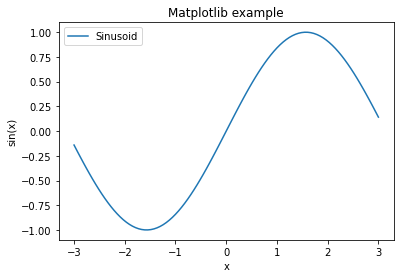

In [ ]:
from matplotlib import pyplot as plt

x_values = np.linspace(-3, 3, 100)

plt.figure()
plt.plot(x_values, np.sin(x_values), label="Sinusoid")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Matplotlib example")
plt.legend(loc="upper left")
plt.show()

We continue with a rudimentary scatter plot example. This example displays samples from the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) using the first two features. Colors indicate class membership (there are 3 classes).

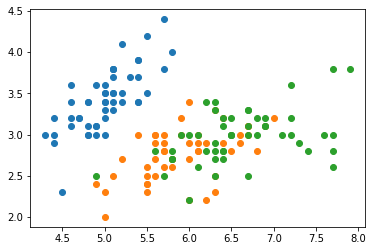

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

X_class0 = X[y == 0]
X_class1 = X[y == 1]
X_class2 = X[y == 2]

plt.figure()
plt.scatter(X_class0[:, 0], X_class0[:, 1], label="Class 0", color="C0")
plt.scatter(X_class1[:, 0], X_class1[:, 1], label="Class 1", color="C1")
plt.scatter(X_class2[:, 0], X_class2[:, 1], label="Class 2", color="C2")
plt.show()

We see that samples belonging to class 0 can be linearly separated from the rest using only the first two features.

### Exercises



**Exercise 1.** Plot the relu and the [softplus](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Softplus) functions on the same graph.

What is the main difference between the two functions?

**Exercise 2.** Repeat the same scatter plot but using the [digits dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) instead.

In [ ]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

Are pixel values good features for classifying samples?

### Going further

*  Official [tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
* [Tutorial](https://www.youtube.com/watch?v=qErBw-R2Ybk) on Youtube

## Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [source](https://seaborn.pydata.org/index.html)

In [ ]:
icecream_df = pd.read_excel("icecream_sales.xlsx")

In [ ]:
icecream_df.head()

temperature weather  sales      flavor
0         16.0   rainy   43.0  strawberry
1         16.0   rainy   68.0   chocolate
2         -2.0   snowy   20.0  strawberry
3         10.0   sunny   38.0  strawberry
4         25.0   sunny   59.0  strawberry

In [ ]:
pd.unique(icecream_df["weather"])

array(['rainy', 'snowy', 'sunny', 'cloudy'], dtype=object)

In [ ]:
icecream_df["weather"].value_counts()

sunny     22
cloudy    20
rainy      8
snowy      6
Name: weather, dtype: int64

In [ ]:
import seaborn as sb

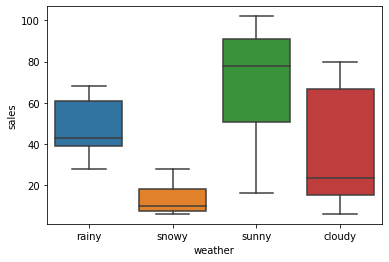

In [ ]:
sb.boxplot(x = "weather", y = "sales", data = icecream_df)

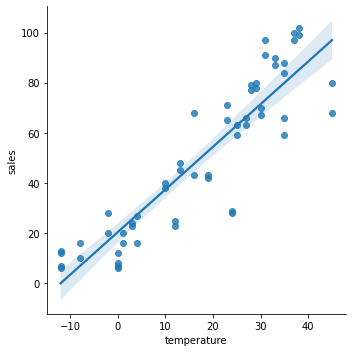

In [ ]:
sb.lmplot(x='temperature', y='sales', data=icecream_df)

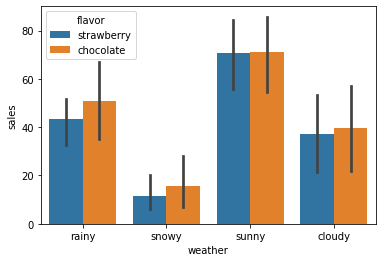

In [ ]:
sb.barplot(x="weather", y="sales", hue="flavor", data=icecream_df)

# Mini Project: Basic Data Analysis

## Diabetes Dataset
Diabetes is a common and serious chronic disease in which people lose the ability to regulate glucose level in their blood. Diabetes can lead to complications such as heart disease, vision impairment, body part amputation, and kidney disease.

In the following dataset, you will be exploring possible factors that may positively or negatively affect the probability of having diabetes.

The dataset has been prepared with a 50-50 split so the numbers of people with and without diabetes are equally distributed.

To understand the dataset more, you can view the dataset's metadata [here](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv).

In [ ]:
import pandas as pd
pd.options.display.max_columns = None

import seaborn as sb

### Exercise: Diabetes Dataset: Basic Analysis
**Mini Project DBT.1** Import the 50-50 split diabetes dataset. Use `diabetes_binary_5050split_health_indicators_BRFSS2015.csv`

**Mini Project DBT.2** See the first few rows of the data. Display basic summarizing statistics. Check data types and any missing values (hint: use `info()`).

**Mini Project DBT.3** How many rows does this dataset have? What's the average BMI among people in this dataset?

**Mini Project DBT.4** How many unique values are in `Diabetes_binary`? What about other columns? Can you write code to list the number of unique values for all columns?

(Scroll down. There are more questions below.)

In [ ]:
# Your code here


In [ ]:
# Your code here


In [ ]:
# Your code here


In [ ]:
# Your code here


In [ ]:
# Your code here


In [ ]:
# Your code here


In [ ]:
# Your code here


In [ ]:
# Your code here

In [ ]:
# Assuming you create a dictionary called `n_unique_values` for above.
df_n_unique_values = pd.DataFrame(n_unique_values, index=['unique value count']).transpose()
df_n_unique_values

unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   80
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

### Exercise: Diabetes Dataset: Basic Analysis (Cont.)

**Mini Project DBT.5** Among people who are smokers, how many of them also have high cholesterol?

**Mini Project DBT.6** What's the average BMI among people with high cholesterol? Among people _not_ with high cholesterol?

**Mini Project DBT.7** How many people in this dataset do not have high blood pressure yet have diabetes?

**Mini Project DBT.8**
- If you are a non-smoker, what's the probability (estimated from data) of having diabetes?
- If you are a smoker, what's the probability (estimated from data) of having diabetes?
- Plot the result in a bar chart.

**Mini Project DBT.9**
Does BMI correlate with the chances of having diabetes? Use visualization techniques you learn from above to answer this question.

**Mini Project DBT.10**
Does income correlate with the chances of having diabetes?

**Mini Project DBT.11**
Your own exploration. Please feel free to explore the dataset further and see what other insights you may have noticed.

Write down your conclusion in a text cell of what you find from this dataset, and state some of the key factors that may affect the probability of having diabetes.

In [ ]:
# Your code here: among people who are smokers, how many of them also have high cholesterol?



In [ ]:
# Your code here: what's the average BMI among people with high cholesterol? Among people _not_ with high cholesterol?


In [ ]:
# Your code here: how many people in this dataset do not have high blood pressure yet have diabetes?


In [ ]:
# Your code here
# If you are a non-smoker, what's the probability (estimated from data) of having diabetes?
# If you are a smoker, what's the probability (estimated from data) of having diabetes?
# Plot the result in a bar chart

In [ ]:
# Your code here


In [ ]:
# Your code here


In [ ]:
# Your code here: does BMI correlate with the chances of having diabetes?


In [ ]:
# Does income correlate with the chances of having diabetes?


### Conclusions (type your findings here)
(Be careful when you make statements about "X causes Y" -- based on what we have found so far, we can only make statements about "X correlates with Y".)

Based on basic data analysis using pandas, seaborn, and basic statistics, we have identified the following key factors that may positively affect the probability of having diabetes:
- A,
- B,
- ...

Anything else you want to mention?

### Going Further
Note that a more rigorous statement about whether a categorical factor (such as sex) does affect the probability of having diabetes or not requires more technical statistical tools such as hypothesis testing, which is outside the scope of this course.

For those who are interested, you can browse "Chi Square Test" on the internet.